0
[[2.00000000e+00 2.00000000e+00]
 [1.96993905e+00 9.99887061e-07]
 [1.96994242e+00 2.24338322e-07]
 ...
 [1.10832953e+01 3.99652591e+00]
 [1.29999991e+01 4.74681976e+00]
 [1.29999990e+01 4.74681975e+00]]
[547.24664979 545.24642489 545.24642143 ... 369.76075978 367.70243663
 367.70243659]
Iteration 1, loss = 22722.77869358
Iteration 2, loss = 22317.50086769
Iteration 3, loss = 21726.05981558
Iteration 4, loss = 20776.99017334
Iteration 5, loss = 19309.19329991
Iteration 6, loss = 17323.56560947
Iteration 7, loss = 15346.11993961
Iteration 8, loss = 14520.28936427
Iteration 9, loss = 14563.11207996
Iteration 10, loss = 14219.60767562
Iteration 11, loss = 14025.25849549
Iteration 12, loss = 13883.97950790
Iteration 13, loss = 13730.05493834
Iteration 14, loss = 13587.86735299
Iteration 15, loss = 13435.45877582
Iteration 16, loss = 13283.88901120
Iteration 17, loss = 13121.23573827
Iteration 18, loss = 12949.86351520
Iteration 19, loss = 12775.37913568
Iteration 20, loss = 12587.7327513

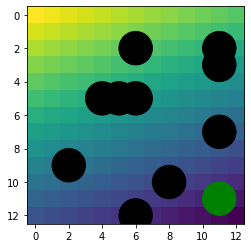

C:\Users\johnf\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


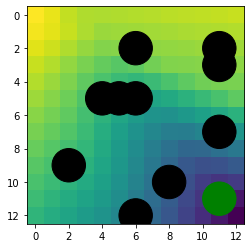

In [819]:
import numpy as np
import skgeom as sg
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

def main():
    circles = np.array([(2, 9), (4, 5), (5, 5), (6, 5), (6, 2), (6, 12), (8, 10)
                           ,(11, 2), (11, 3), (11, 7)])
    finish = (11,11)
    box = np.array([sg.Segment2(sg.Point2(0,0),sg.Point2(0,13)),
                    sg.Segment2(sg.Point2(0,13),sg.Point2(13,13)),
                    sg.Segment2(sg.Point2(13,13),sg.Point2(13,0)),
                    sg.Segment2(sg.Point2(13,0),sg.Point2(0,0))])
    # asd = sg.Segment2(sg.Point2(0,0),sg.Point2(0,13))
    # qwe = sg.Point2(4.0123,-2.1233)
    # qwe2 = sg.Segment2(sg.Point2(-1,-1),sg.Point2(12,12))
    # print(sg.intersection(asd, qwe2))
    #print(-0.0 == 0.0)
    # print(float(qwe.hx()))
    #print(asd.source())
    #print(asd.target())
    #print(box[0])

    n_examples = 100000
    X = np.empty((n_examples,2))
    y = np.empty(n_examples)
    count = 0
    while True:
        line_x = list()
        line_y = list()
        print(count)
        start = (2,2)
        line_x.append(start[0])
        line_y.append(start[1])
        finish_check = list()
        total_distance = 0
        while True:
            direction = np.random.random() * 2*np.pi
            # print("Direction ", direction)
            rand_v = np.array([np.cos(direction), np.sin(direction)])
            end = (start[0]+9000*rand_v[0], start[1]+9000*rand_v[1])
            gogo = sg.Segment2(sg.Point2(start[0], start[1]), sg.Point2(end[0], end[1]))

            intersections = list()
            #First check circles
            for circle in circles:
                intersection = circle_line_segment_intersection(circle, 1, start, end)
                if intersection is not None:
                    for i in intersection:
                        intersections.append(i)

            #Now check box
            for line in box:
                intersection = sg.intersection(gogo, line)
                if intersection is not None:
                    intersections.append((float(intersection.hx()), float(intersection.hy())))

            #Now check finish_check
            intersection = circle_line_segment_intersection(finish, 1, start, end)
            if intersection is not None:
                for i in intersection:
                    intersections.append(i)
                    finish_check.append(i)

            #Now find closes point
            min_dist = 9000
            closest_point = None
            for intersection in intersections:
                delta_x = start[0]-intersection[0]
                delta_y = start[1]-intersection[1]
                #print(delta_x)
                #print(delta_y)
                dist = np.sqrt(delta_x**2+delta_y**2)
                if dist < min_dist:
                    min_dist = dist
                    closest_point = intersection
            total_distance += min_dist
            #Remove a tiny amount in opposite direction to avoid clipping over lines
            if (len(finish_check) > 0 and closest_point == finish_check[0]) or (len(finish_check) > 1 and closest_point == finish_check[1]):
                closest_point = (closest_point[0]+(-0.000001*rand_v[0]),closest_point[1]+(-0.000001*rand_v[1]))
                start = closest_point
                line_x.append(start[0])
                line_y.append(start[1])
                break

            closest_point = (closest_point[0]+(-0.000001*rand_v[0]),closest_point[1]+(-0.000001*rand_v[1]))
            start = closest_point
            finish_check = list()
            line_x.append(start[0])
            line_y.append(start[1])
            # print(start)
        #break
        #plot_trajectory(line_x, line_y, circles)
        for i in range(len(line_x)):
            if count == n_examples:
                break
            if i != 0:
                delta_x = line_x[i] - line_x[i-1]
                delta_y = line_y[i] - line_y[i-1]
                total_distance -= np.sqrt(delta_x**2 + delta_y**2)
            X[count,0] = line_x[i]
            X[count,1] = line_y[i]
            y[count] = total_distance
            count += 1
        if count == n_examples:
            break
    #np.save("X", X)
    #np.save("y", y)
    X = np.load("X.npy")
    y = np.load("y.npy")
    print(X)
    print(y)
    model = LinearRegression()
    model.fit(X, y)
    heatmap = np.empty((13,13))
    for i in range(13):
        for j in range(13):
            pred = model.predict([[i,j]])
            heatmap[i,j] = pred[0]
    for circle in circles:
        c=plt.Circle(circle, radius=1, color="black")
        plt.gca().add_artist(c)
    c=plt.Circle((11,11), radius=1, color="green")
    plt.gca().add_artist(c)
    plt.imshow(heatmap)
    plt.savefig("Heatmap Regressor")
    plt.show()
    model = MLPRegressor((100,100,100),activation="relu", verbose=True, batch_size=16384, max_iter=50)
    model.fit(X, y)
    for i in range(13):
        for j in range(13):
            pred = model.predict([[i,j]])
            heatmap[i,j] = pred[0]
            if i == 2 and j == 2:
                print("Expected time, ", pred[0])
    print(heatmap)
    asd = np.argmax(heatmap)
    index = np.unravel_index(asd, (13,13))
    print("max index", index)
    print("max_val", heatmap[index])
    for circle in circles:
        c=plt.Circle(circle, radius=1, color="black")
        plt.gca().add_artist(c)
    c=plt.Circle((11,11), radius=1, color="green")
    plt.gca().add_artist(c)
    plt.imshow(heatmap)
    plt.savefig("Heatmap MLP")
    plt.show()

def plot_trajectory(line_x, line_y, circles):
    # print(line_x)
    # print(line_y)

    #create circle with (x, y) coordinates at (10, 10)
    for circle in circles:
        c=plt.Circle(circle, radius=1, color="black")
        plt.gca().add_artist(c)

    c=plt.Circle((11,11), radius=1, color="green")
    plt.gca().add_artist(c)
    #add circle to plot (gca means "get current axis")
    plt.plot(line_x, line_y)
    b = plt.Rectangle((0,0),13,13, edgecolor="black", fill=False)
    plt.gca().add_artist(b)
    plt.axis([0, 13, 0, 13])
    plt.axis("equal")
    plt.savefig("Run9")
    #plt.plot([0,0,13,13],[0,13,13,0])
    #add circle to plot (gca means "get current axis")
    plt.show()


# https://web.archive.org/web/20111108065352/https://www.cs.mun.ca/~rod/2500/notes/numpy-arrays/numpy-arrays.html


def circle_line_segment_intersection(circle_center, circle_radius, pt1, pt2, full_line=False, tangent_tol=0):
    """ Find the points at which a circle intersects a line-segment.  This can happen at 0, 1, or 2 points.

    :param circle_center: The (x, y) location of the circle center
    :param circle_radius: The radius of the circle
    :param pt1: The (x, y) location of the first point of the segment
    :param pt2: The (x, y) location of the second point of the segment
    :param full_line: True to find intersections along full line - not just in the segment.  False will just return intersections within the segment.
    :param tangent_tol: Numerical tolerance at which we decide the intersections are close enough to consider it a tangent
    :return Sequence[Tuple[float, float]]: A list of length 0, 1, or 2, where each element is a point at which the circle intercepts a line segment.

    Note: We follow: http://mathworld.wolfram.com/Circle-LineIntersection.html
    """

    (p1x, p1y), (p2x, p2y), (cx, cy) = pt1, pt2, circle_center
    (x1, y1), (x2, y2) = (p1x - cx, p1y - cy), (p2x - cx, p2y - cy)
    dx, dy = (x2 - x1), (y2 - y1)
    dr = (dx ** 2 + dy ** 2)**.5
    big_d = x1 * y2 - x2 * y1
    discriminant = circle_radius ** 2 * dr ** 2 - big_d ** 2

    if discriminant < 0:  # No intersection between circle and line
        return None
    else:  # There may be 0, 1, or 2 intersections with the segment
        intersections = [
            (cx + (big_d * dy + sign * (-1 if dy < 0 else 1) * dx * discriminant**.5) / dr ** 2,
             cy + (-big_d * dx + sign * abs(dy) * discriminant**.5) / dr ** 2)
            for sign in ((1, -1) if dy < 0 else (-1, 1))]  # This makes sure the order along the segment is correct
        if not full_line:  # If only considering the segment, filter out intersections that do not fall within the segment
            fraction_along_segment = [(xi - p1x) / dx if abs(dx) > abs(dy) else (yi - p1y) / dy for xi, yi in intersections]
            intersections = [pt for pt, frac in zip(intersections, fraction_along_segment) if 0 <= frac <= 1]
        if len(intersections) == 2 and abs(discriminant) <= tangent_tol:  # If line is tangent to circle, return just one point (as both intersections have same location)
            return [intersections[0]]
        else:
            return intersections

main()

#Longest time from